Question 1: Create a unique name for each restaurant. On the DataFrame created above, add a new column to your DataFrame, called 'RESTAURANT', that combines DBA, BUILDING, STREET, and ZIP-CODE fields. For example, \WENDY'S 469 FLATBUSH AVENUE 11225".
Print the first 10 values of the RESTAURANT column of your DataFrame.

Approach: 
To solve this problem, I first read the .csv file from the computer using read_csv function from pandas library. Then, I concatenated the values of DBA, BUILDING, STREET and ZIPCODE in to the new column 'RESTAURANT' of the df DataFrame.
To print the result of first 10 rows of RESTAURANT column, I selected the column name in square brackets and indexed it to first 10 rows. The result is a series with index 0:9 and corresponding values of RESTAURANT column.

In [16]:
from pandas import Series, DataFrame
import pandas as pd 
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [17]:
df= pd.read_csv('E:/DataAnalytics_programming/NYC_Restaurants.csv',dtype=unicode) # Read .csv file
df1=df
df1['RESTAURANT']= df1['DBA']+" "+df1['BUILDING']+" "+df1['STREET']+" "+df1['ZIPCODE'] #concatenating
df1['RESTAURANT'][:10] #outputting the results

0                    WENDY'S 469 FLATBUSH AVENUE 11225
1                    WENDY'S 469 FLATBUSH AVENUE 11225
2                    WENDY'S 469 FLATBUSH AVENUE 11225
3                    WENDY'S 469 FLATBUSH AVENUE 11225
4                    WENDY'S 469 FLATBUSH AVENUE 11225
5               TOV KOSHER KITCHEN 97-22 63 ROAD 11374
6               TOV KOSHER KITCHEN 97-22 63 ROAD 11374
7               TOV KOSHER KITCHEN 97-22 63 ROAD 11374
8               TOV KOSHER KITCHEN 97-22 63 ROAD 11374
9    BRUNOS ON THE BOULEVARD 8825 ASTORIA BOULEVARD...
Name: RESTAURANT, dtype: object

Question 2: How many restaurants are included in the data?
Careful now:
 A "Subway" in one particular address (i.e., building, street, zipcode,and boro) counts as one restaurant; don't combine all Subways into one restaurant!
 The data can have multiple violations for the same restaurant!

Approach:
Since the RESTAURANT Column includes the building, Street, Zipcode and Boro; Removing duplicates for the column RESTAURANT2 will give unique values for all the restaurants for all addresses. I am using df.shape function to extract the dimensions of this DataFrame with unique Restaurants. Further, using [0] indicates the first index i.e. number of unique restaurants while leaving out the number of columns(or features of the restaurant) 

In [18]:
df1['RESTAURANT2']= df1['DBA']+" "+df1['BUILDING']+" "+df1['STREET']+" "+df1['ZIPCODE']+" "+df1['BORO']
df1.drop_duplicates(subset="RESTAURANT2").shape[0] #extracting the number of unique restaurants

10114

Question 3: How many chains are there? Let us define a chain to be the same 
restaurant name occurring in at least two different (building, street, zipcode) addresses.

Approach:
I created a dataFrame with unique values based on DBA, Building, street and Zipcode to capture different addresses of different restraunts.
Next, I am checking in the resulting dataset which DBAs have more than one different addresses. I have True/False Values for each restaurant which qualify to be a 'chain' or not respectively. using value_counts(), I found out the number of chains that are there.

In [19]:
df_without_duplicates = df.drop_duplicates(subset=('DBA','BUILDING','STREET','ZIPCODE'))
mask = df_without_duplicates['DBA'].value_counts()>1 # True and False would be generated if a DBA is a chain or not
mask.value_counts() # this will count the number of individual True and False, thus, giving the number of chains corresponding to True

False    8448
True      368
Name: DBA, dtype: int64

Question 4: Plot a bar graph of the top 20 most popular chains.
We already have the chains from the previous problem.

Approach:
Firstly, I generated a series with the frequency of all Restaurants unique by Address(dataset from previous question). By sorting the 'Names' of restaurants in the descending order of restraunts associated with each one of them, we get a series of frequency in descending order. Then, I chose the top 20 restaurant chain from them and plotted them in the bar graph below.   

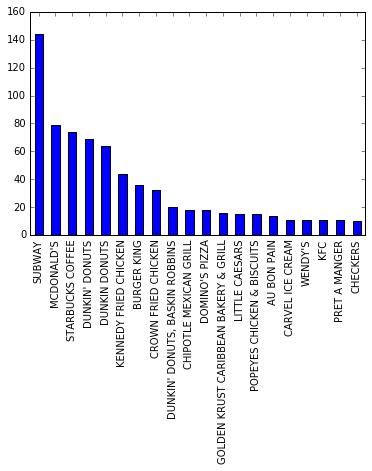

In [20]:
frequency= df_without_duplicates['DBA'].value_counts()
k=frequency.sort_values(ascending=False)[:20] # since we have more than 20 chains, this command will give the top 20 chains
k.plot(kind='bar')

Question 5: What fraction of all restaurants are chains?

Approach:

I created a dataset unique by DBA, Building, Street and Zipcode.
Creating a series of number of restaurants for each DBA, I created a mask where DBA have more than one restaurants. Using this mask, I created a series of chains (DBA s with more than one Restaurants).
Ratio of sum of total restaurants in this series to the total number of unique restaurants gives the final answer.

In [21]:
df_without_duplicates = df.drop_duplicates(subset=('DBA','BUILDING','STREET','ZIPCODE'))
series_of_DBA= df_without_duplicates['DBA'].value_counts() # output is a series with DBA name as index and count as values
mask = series_of_DBA>1 # creating a mask where values >1
series_updated= series_of_DBA[mask] # using the mask to extract a series with index as DBA and values as count of restaurants
float(series_updated.sum())/float(len(df_without_duplicates)) # Ratio of total restaurants that are chains to total restaurants

0.16472216729286138

Question 6: Plot the number of non-chain restaurants in each boro. First, we need to figure out all the non-chain restaurants, then select out only those restaurants, and finally plot the number of such restaurants by boro. Make sure to look at the plot; we don't want to see... oh... the "missing" boro.

Approach:
I created a Series : chains which contains the numbers of retraunts for all DBA's. Then, Series chains1 is created from this series such that the number of restraunts is equal to one for a DBA(to pick up non-chain restraunts). 
Next, using the index of this new series as list, I checked whether any of the rows from the refined data (data without duplicates) is present in that list. If yes, I am reading the corrsponding row from the df_without_duplicates into final_df.
Picking the rows from final_df where 'BORO' is not null.
Now, to remove the 'Missing' entry of 'BORO' in the data, I have created a mask, using which I set all such entries in the dataset to NaN
Finally ,plotting the curve with number of restraunts against BORO. 

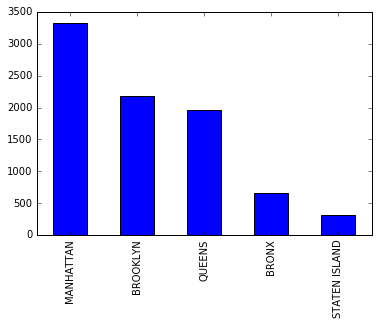

In [22]:
chains= df_without_duplicates['DBA'].value_counts()
chains1=chains[chains==1] #create a series with non chain restaurants
final_df=df_without_duplicates[df_without_duplicates['DBA'].isin(list(chains1.index))] # DataFrame for non chain restaurants
final_df=final_df[final_df['BORO'].notnull()] # removing Null values of Boro if any

mask = (final_df['BORO'] == 'Missing') # mask for Boro="Missing"
final_df.ix[mask, 'BORO'] = np.nan  # assigning NAs to all 'Missing' BOROs 

final_df['BORO'].value_counts().plot(kind='bar') # plot the frequency By Boro ( this will automatically remove NA values appended above)

Question 7: Plot the fraction of non-chain restaurants in each boro. 
The boro with the most non-chain restaurants might just be the boro with the most restaurants in general. If we want to find the boro that attracts the most "independent" restauranteurs, we must divide the number of non-chain restaurants by the total number of restaurants in the boro. Plot this.    
Is the boro with the most independent restaurants also the one with the highest ratio of independent restaurants?
    
Approach:
Removing the missing BORO values from the overall dataset, divide the number of non chain restraunts to the total restraunts in each BORO and plot the same. Manhattan is the boro with the most independent restaurants while Brooklyn is the one with the maximum fraction of most independent restaurants.

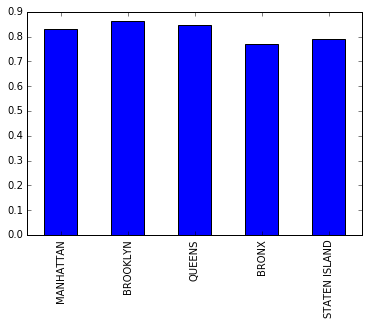

In [23]:
df_without_duplicates1=df_without_duplicates[df_without_duplicates['BORO'].notnull()]

mask2 = (df_without_duplicates1['BORO'] == 'Missing')
df_without_duplicates1.ix[mask2, 'BORO'] = np.nan 
((final_df['BORO'].value_counts())/(df_without_duplicates1['BORO'].value_counts())).plot(kind='bar')
# numerator is the frequency of non chain restaurants by Boro : final_df data has been taken from previous question for non chain restaurants
# denominator is the frequency of all restaurants by Boro

Question 8: Plot the popularity of cuisines. Which cuisines are the most well-represented among all restaurants? Plot the popularity of the top 20 cuisines. Again, be careful in your counting: remember that the same restaurant can have multiple violations!

Approach:
With data having unique restaurants by location, I calculated Value Counts for each Cuisine Description, which I sorted based in decreasing order, selected top 20 and plotted them in the bar chart below.

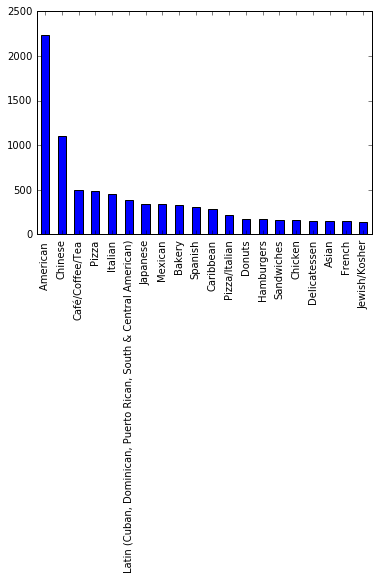

In [24]:
df_without_duplicates['CUISINE DESCRIPTION'].value_counts().sort_values(ascending=False)[:20].plot(kind='bar')

Question 9: Plot the cuisines among restaurants which never got cited for violations. Ideally, you should explore and see what happens when there is no violation, but here I will just tell you: the 'VIOLATION CODE' field is missing.
 Select only the 'RESTAURANT' and 'CUISINE DESCRIPTION' columns of the DataFrame (we created the 'RESTAURANT' field in an earlier question).
 Select the instances where a restaurant did not get cited.
 Among these instances, how frequent is each of the cuisines?
Plot the frequencies of the top-20 among these cuisines.

Approach:
In the original dataset, I first created a variable called 'Flag Violation' that takes on the value 1 for any VIOLATION CODE that has been cited.i.e. for Null Violation Codes, the flag equals zero. Then I generated a pivot such that the resulting values for Flag_violation are maximum value for all rows corresponding to one particular "RESTAURANT". This will essentially capture the information whether or not any REATAURANT has been cited for violations EVER. Next using the pivot, I created a mask for all those restaurants which have never been citrd for any Violations. Use this mask with unique Restaurant dataset in order to extract information on CUISINE for it. Then, I plotted the count for Cuisines.

In [25]:
df5=df1
#creating a flag for every instance a restaurant got cited for violations
df5.ix[df5['VIOLATION CODE'].isnull(),'Flag_violation']=0
df5.ix[df5['VIOLATION CODE'].notnull(),'Flag_violation']=1

#create a pivot table to find the maximum of the Violation flag for every Restaurant and convert it into a DataFrame
series_violated = pd.DataFrame(pd.pivot_table(df5,
                                             index='RESTAURANT',
                                             values = 'Flag_violation',
                                              aggfunc=max,
                                             fill_value=0))

#create a mask where the Flag_violation column is zero i.e. the restaurant never got cited for violations
mask=series_violated['Flag_violation']== 0
#use the mask to get a new dataframe with restaurants which never got cited
never_violated = series_violated[mask]

#From the original dataset ,extract Restaurant, Cuisine description unique on these two columns
df_9 = df1.drop_duplicates(subset=('RESTAURANT','CUISINE DESCRIPTION'))[['RESTAURANT','CUISINE DESCRIPTION']]

#extract all columns from the dataset created above (df_9) the restraunts which never got cited for violations
merged_data = df_9[df_9['RESTAURANT'].isin(list(never_violated.index))]

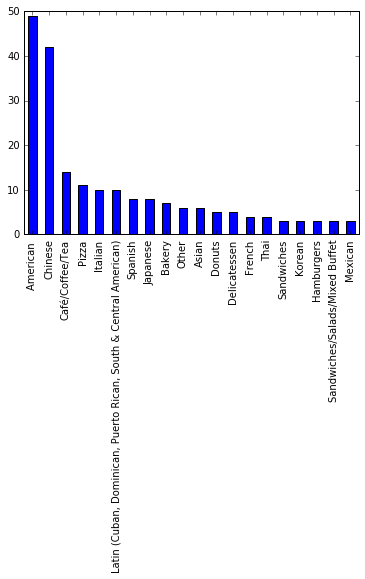

In [26]:
merged_data['CUISINE DESCRIPTION'].value_counts().sort_values(ascending=False)[:20].plot(kind='bar')
# counting the frequency, corting it and plotting the top 20 

Question 10:
What cuisines tend to be the "cleanest"?
 Select all cuisines for which there were at least 20 restaurants representing that cuisine.
 For each such cuisine, compute the ratio of inspections where the violation code is missing (so the inspection passed) versus the total number of rows for that cuisine. (This is just the ratio of counts in the previous two questions.)
 Find the top-10 cuisines with the highest ratios; these are that cuisines
whose restaurants are "most likely to be clean." (Hint: Check out the "sort values" method for Series).

Approach:
Firstly, I created a Series with count of unique Restaurants for each Cuisine. From this series, I selected just the cuisines for which count >=20. 
Next, I filtered out the restaurants (which never got cited for violations (from Q9)) based on the list of cuisines description in cuisines_rest Series.
Similarly, I filtered out the restaurants (from Q8) based on the list of cuisines description in cuisines_rest Series.

Dividing the .value_counts() obtined from the two tables will give the required ratio, which needs to be sorted in descending order and the first 10 elements of the Series are the result.

In [118]:
# creating a Series for cuisines with more than 20 restaurants
cuisines_rest = df_without_duplicates['CUISINE DESCRIPTION'].value_counts()
cuisines_rest = cuisines_rest[cuisines_rest>20]

# list of restaurants with the cuisines in 'cuisines_rest' and that never got cited for violations (from Q9)
numerator = merged_data[merged_data['CUISINE DESCRIPTION'].isin(list(cuisines_rest.index))]

# list of restaurants with the cuisines in 'cuisines_rest' (from Q8)
denominator = df_without_duplicates[df_without_duplicates['CUISINE DESCRIPTION'].isin(list(cuisines_rest.index.values))]

#calculating ratio, sorting them and printing top 10 ratios
(numerator['CUISINE DESCRIPTION'].value_counts()/denominator['CUISINE DESCRIPTION'].value_counts()).sort_values(ascending=False)[:10]

Soul Food                        0.090909
Vietnamese/Cambodian/Malaysia    0.062500
Other                            0.058252
Soups & Sandwiches               0.047619
Continental                      0.047619
Barbecue                         0.047619
Asian                            0.041096
Chinese                          0.038251
Greek                            0.036364
Peruvian                         0.035714
Name: CUISINE DESCRIPTION, dtype: float64

Question 11: What are the most common violations in each borough? Create a table of the number of times each violation description was observed in each borough, and figure out the most common violation description for each borough.
To create the table, check out the crosstab function. We will see a more general version of this when we discuss groupby in class.
Once you do have the table, you will still need to find the most common violation description for each borough.

Approach:
First, I used the crosstab function to find frequencies of each violation code by each of the buroughs. Using idxmax() function in data frame, I could find out the COde with Maximum Violations for each BORO. Merging this data set with original dataset on VIOLATION CODE, I extracted out the VIOLATION DESCRIPTION AS WELL

In [28]:
df_unique_violation=df1.drop_duplicates(subset=('RESTAURANT','VIOLATION CODE')) # unique on Restaurant and Violation
freq_table= pd.crosstab(df_unique_violation['VIOLATION DESCRIPTION'], df_unique_violation['BORO']) # index is Violation description and columns are 'Boro'
del freq_table['Missing'] # deleting the column with 'Missing' Boro
print freq_table.idxmax() # print the index with maximum value for each Boro

BORO
BRONX            Non-food contact surface improperly constructe...
BROOKLYN         Non-food contact surface improperly constructe...
MANHATTAN        Non-food contact surface improperly constructe...
QUEENS           Non-food contact surface improperly constructe...
STATEN ISLAND    Non-food contact surface improperly constructe...
dtype: object


Question 12: What are the most common violations per borough,after normalizing for the relative abundance of each violation?
Hopefully, the answer to the previous question left you unsatisfied, because some violations are just very common, irrespective of borough. A better approach would be to normalize the violation counts, as follows.
 Get overall frequencies: Figure out how common each violation is, overthe entire dataset; let's call this violationFrequency.
 Normalize: Consider the table of number of violations by boro that you created for the previous question. For each borough, divide the number of violations of each type by the total number of violations for that type; i.e., divide the series of violations by violationFrequency. We want to do this for each borough.
 Find the biggest violations: Now, after this normalization, for each borough, figure out the most common violation description.

Approach:
Removing all the values for missing BOROs, I created a frequency table between BOROs and VIOLATIONS. Next, I created a series with total counts for each of the violations to be used for standardization. I added this series as a column to the data frame with frequencies for ease of operation. 
Then, I built a function that would divide all rows of the selected column of the dataframe by the corresponding row of the 'VIOLATION FREQ' column and thus, generating standardized results in the whole table.
Finally, using idxmax() function on the dataset produces the desired output.

In [29]:
df2=df_unique_violation[df_unique_violation['BORO']!="Missing"] # removing missing Boros
freq_table= pd.crosstab(df2['VIOLATION DESCRIPTION'], df2['BORO']) # crosstab results in Violation description as indices and Boro as columns
violationFrequency = df2['VIOLATION DESCRIPTION'].value_counts() # frequency of restaurants by Violation description

#create a new table with additional column violation frequency which has total number of instances a restaurant has been violated by that violation description
freq_table2 = freq_table
freq_table2['VIOLATION FREQ']= violationFrequency


def normalize_func(boro):
    '''create a function that divides each row by the corresponding number in the VIOLATION FREQ Column for the selected BORO'''
    freq_table2[boro]= freq_table2[boro]/freq_table['VIOLATION FREQ']
    return 

normalize_func('BRONX')
normalize_func('BROOKLYN')
normalize_func('MANHATTAN')
normalize_func('QUEENS')
normalize_func('STATEN ISLAND')
freq_table2.idxmax() #select the index with maximum value for each BORO(each column)

BORO
BRONX                                   Unprotected food re-served.
BROOKLYN          Precooked potentially hazardous food from comm...
MANHATTAN         Out-of package sale of tobacco products observed.
QUEENS            Caloric content range (minimum to maximum) not...
STATEN ISLAND     Eggs found dirty/cracked; liquid, frozen or po...
VIOLATION FREQ    Non-food contact surface improperly constructe...
dtype: object

Question 13: How many phone area codes correspond to a single zipcode? The first three digits of the restaurant phone numbers are their area codes. The area codes do not generally align with zip codes, but some area codes are only for a single zip code. You must figure out how many area codes have this property.
 To extract the first 3 characters of the phone number, recall that strings are pretty similar to lists.

Approach:
I created a function that would extract the first three characters of a string. Using this, I created the column 'AREA CODES'. Then, I created a data frame that is unique by ZIPCODES and AREA Codes. 
Since the objective of the question is to find the number of AREA CODES that are unique by ZIPCODE, I created a mask such that the value_counts() should equal to one for an AREA CODE. This essentially means that in a dataset with unique AREA CODE-ZIPCODE Combinations, there is just one entry for a unique AREA CODE. Thus, the area code is unique to some ZIPCODE. Value_counts() on this mask gives me 34 as the number of AREA CODES unique to ZIPCODES

In [42]:
#function to return first three characters of a string
def area_code(s):
    '''Extracting the first 3 characters of the string'''
    return s[:3]

#Applying the function to all elements of Phone column of the data frame with Unique Restaurants
df_without_duplicates['AREA CODES'] = df_without_duplicates['PHONE'].map(area_code) 

#creating dataframe unique by Area code and ZIPCODE
zipcode_areacode = df_without_duplicates.drop_duplicates(subset=('ZIPCODE','AREA CODES'))[['ZIPCODE','AREA CODES']]

# .value_counts() function will give a series having all the area codes and count of corresponding zipcodes its associated to
#following mask will give True for Area codes which are related to just 1 zipcode
mask= zipcode_areacode['AREA CODES'].value_counts()==1

#ounting the number of True and False. Count of True is our answer
mask.value_counts()

True     34
False    22
Name: AREA CODES, dtype: int64

Question 14: Find common misspellings of street names Sometimes, it's Avenue, and sometimes, it's Ave. We will try to come up with an automated way to find common misspellings. The idea is the following: if Ave and Avenue are the same, they should show up often in similar-sounding street names, e.g., Lexington Ave and Lexington Avenue.

(a) Create a new column, called STREET TYPE, which is the the last word in the name of the street. For example, if the street is "Astoria Boulevard", the street type should be "Boulevard".

Approach :

Using Regular expressions, I creates lists of words in each STREET and extracted the last word from the resulting list.
I created a new column STREET TYPE and added the return of the function in it

In [41]:
data1= df_without_duplicates
import re
def last_word(s):
    '''function to extract the last word'''
    l=[]
    for i in re.split('\W',s.upper()):  # identifies alphanumeric, digits and underscores and displays blank for the rest 
        if i!="":
            l.append(i)
    return l[(len(l)-1)]

#Applying function to all elements in STREET Column
data1['STREET TYPE']=data1['STREET'].map(last_word)


(b) Create another column, called STREET BASE, which contains everything but the last word in the name of the street. For example, if the street is "Astoria Boulevard", the street base should be "Astoria".

(c) Create a third column, called STREET BASE & ZIP, that combines the street base and the zipcode.

Approach :

Using Regular expressions, I creates lists of words in each STREET and extracted all except last word from the resulting list. converting the resulting list into a string, I created a new column STREET TYPE and added the return of the function in it.
Then, I concatenated the STREET BASE with ZIPCODE usinng "+"

In [40]:
def not_last_word(s):
    '''Function to extract all but the last word of a string'''
    l=[]
    for i in re.split('\W',s.upper()):  # identifies alphanumeric, digits and underscores and displays blank for the rest 
        if i!="":
            l.append(i)
    return ', '.join(l[0:len(l)-1])

#applying function on all elements of the STREET Column
data1['STREET BASE']=data1['STREET'].map(not_last_word)

#Concatenate street base and zipcode
data1['STREET BASE & ZIP']= data1['STREET BASE'] + " " + data1['ZIPCODE']

(d)Create a table containing just these three columns, and remove any duplicates or instances where street base is empty. This table now contains unique street names, along with the street type.

Approach:

Removed duplicates from the resulting list. Also, checked if any of the STREET BASE is null or not

In [33]:
#unique rows based on street type, base and street base & zipcode
new_table = data1.drop_duplicates(subset=('STREET TYPE','STREET BASE','STREET BASE & ZIP'))[['STREET TYPE','STREET BASE','STREET BASE & ZIP']]

#remove the nulls
new_table=new_table[(new_table['STREET BASE'].notnull())]

# remove the blanks as well
new_table=new_table[(new_table['STREET BASE'] != "")]

(e) Merge this table with itself, on the STREET BASE & ZIP column. Thus, in the new merged tabled, we will have two STREET TYPE fields for each street base and zipcode. For example, if both Lexington Ave and Lexington Avenue exist in the same zipcode, we will get a row for the street base Lexington and the two street types Ave and Avenue.

Approach:

Merging the table with itself using pandas.merge() function on STREET BASE & ZIP Key.

In [34]:
merged_table = pd.merge(new_table, new_table, left_on = "STREET BASE & ZIP",right_on ="STREET BASE & ZIP") # merge operation
merged_table[:3]

,STREET TYPE_x,STREET BASE_x,STREET BASE & ZIP,STREET TYPE_y,STREET BASE_y
0,AVENUE,FLATBUSH,FLATBUSH 11225,AVENUE,FLATBUSH
1,AVENUE,FLATBUSH,FLATBUSH 11225,AVE,FLATBUSH
2,AVE,FLATBUSH,FLATBUSH 11225,AVENUE,FLATBUSH


(f)From the merged table, select only the rows where the street types are different.

Approach: 

From the resulting dataset, keep only those rows, for which different street names have been observed while removing the rest

In [35]:
merged_table=merged_table[merged_table['STREET TYPE_x']!= merged_table['STREET TYPE_y']] #keeping only non equal values of both street types
merged_table[:3]

,STREET TYPE_x,STREET BASE_x,STREET BASE & ZIP,STREET TYPE_y,STREET BASE_y
1,AVENUE,FLATBUSH,FLATBUSH 11225,AVE,FLATBUSH
2,AVE,FLATBUSH,FLATBUSH 11225,AVENUE,FLATBUSH
5,ROAD,63,63 11374,DRIVE,63


(g) Now, do a cross-tabulation of the two distinct street types (check out the crosstab function in Pandas). This gives us the number of times Ave and Avenue were used with the same STREET BASE & ZIP.

(h) From this cross-tabulation table, find the most commonly street type that occurs with each of the following: AVE, ST, RD, PL, BOULEARD, and BULEVARD.

Approach:

Doing a crosstab() on the STREET TYPEs will give the frequencies of different 'STREET TYPEs'that have been used.
Then, by finding the maximum of the columns, I extracted the most commonly occuring street types for: AVE, ST, RD, PL, BOULEARD, and BULEVARD.

In [36]:
ct_result= pd.crosstab(merged_table['STREET TYPE_x'],merged_table['STREET TYPE_y']) # making a crosstab for both street names

In [37]:
#AVE, ST, RD, PL, BOULEARD, and BULEVARD
#following will give the most commonly used street type (or phrase) being used for each one of the above.
print 'AVE'+": "+ct_result['AVE'].idxmax()
print 'ST'+": "+ct_result['ST'].idxmax()
print 'RD'+": "+ct_result['RD'].idxmax()
print 'PL'+": "+ct_result['PL'].idxmax()
print 'BOULEARD'+": "+ct_result['BOULEARD'].idxmax()
print 'BULEVARD'+": "+ct_result['BULEVARD'].idxmax()


AVE: AVENUE
ST: STREET
RD: ROAD
PL: PLACE
BOULEARD: BLVD
BULEVARD: BLVD
